In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os,sys,glob,re
import statistics

In [7]:
# CONSTANTS
RATES_DIR = "/rates/"
RESULTS_DIR_DOCKER = "/now/db/"
RESULTS_DIR = "/home/alex/ds2docker/runtime/db/"
PATH = "./db/"
PLOT_DIR = PATH + "plots/"

In [8]:
class Analyzer():
    # Column names that all queries have in common
    mainHeader = ['operator','parallel','id','operator_id','op_instance_id','total_op_instances','epoch_timestamp','true_proc_rate','true_output_rate','observed_proc_rate','observed_output_rate']

    # Specific column names per Query
    headers={
        "Query1": ["ExchangeRate","SourceRate","BidSource","PMap/LSink"],
        "Query2":["SourceRate","BidSource","FMap/LatencySink"],
        "Query3":["AuctionRate","PersonRate","PAuctionSource","PPersonSource","IncJoin/Sink"],
        "Query3Stateful":["AuctionRate","PersonRate","PAuctionSource","PPersonSource","IncJoin/Sink"],
        "Query5":["SourceRate","BidsSource","SlidingWindow/LatencySink"],
        "Query8":["AuctionRate","PersonRate","PAuctionSource","PPersonSource","IncJoin/Sink"],
        "Query11":["SourceRate","BidsSource","SessionWindow/LatencySink"],
    }

    # how many columns are related for rates.
    ratesPerQuery = {
        "Query1": 2,
        "Query2": 1,
        "Query3": 2,
        "Query3Stateful": 2,
        "Query5": 1,
        "Query8": 2,
        "Query11": 1,
    }
    
    def __init__(self, queryName = "all",specifier = ""):
        if queryName in self.headers:
            if specifier != "":
                specifier = "_" + specifier
            self.fileName = PATH + queryName + specifier +".csv"
            print("READING " + self.fileName)
            self.queryName = queryName
            self.setQuery()

    def setQuery(self):
        """ Read the corresponding csv file for the set queryName
            Store the results in a pandas.Dataframe and filter out duplicate/NaN rows """
        self.data = pd.read_csv(self.fileName,names = self.mainHeader[:4] + self.headers[self.queryName] + self.mainHeader[4:])
        self.data.drop(self.data.columns[3],axis=1,inplace=True) # drop duplicate name operator
        self.data.drop(self.data.columns[1],axis=1,inplace=True) # drop duplicate parallelism value
        print("READ " + str(len(self.data)))
        # remove any duplicate row or any row that has a NaN value
        self.data = self.data.drop_duplicates().dropna()
        #print("dupl " + str(len(self.data.drop_duplicates())))   
        #self.data = self.data[self.data['total_op_instances'].notna()]
        print("NA dropped " + str(len(self.data)))   


In [9]:
queryName = "Query1"
file_specifier = "metricsv1"
analyzer = Analyzer(queryName, file_specifier)
data=analyzer.data

READING ./db/Query1_metricsv1.csv
READ 11746
NA dropped 8874


In [10]:
data.head(5)

,operator,id,ExchangeRate,SourceRate,BidSource,PMap/LSink,op_instance_id,total_op_instances,epoch_timestamp,true_proc_rate,true_output_rate,observed_proc_rate,observed_output_rate
0,Source: Bids Source,0,0.8,40000,1,1,1.0,1.0,5.257825e+15,0.000000e+00,40246.774005,0.000000,39812.432104
1,Mapper,0,0.8,40000,1,1,1.0,1.0,5.257825e+15,3.344366e+05,334439.132575,39665.291913,39665.589131
2,Latency Sink,0,0.8,40000,1,1,1.0,1.0,5.257825e+15,4.215311e+06,0.000000,39709.403781,0.000000
3,Source: Bids Source,1,0.8,40000,1,1,1.0,1.0,5.257835e+15,0.000000e+00,40725.000784,0.000000,40030.638291
4,Mapper,1,0.8,40000,1,1,1.0,1.0,5.257835e+15,3.294475e+05,329449.109722,40027.513722,40027.713677


In [19]:
df = data[(data["total_op_instances"] == 3.0) & (data["operator"] == "Latency Sink" ) & (data["SourceRate"] == 40000 )]

df[df]

,operator,id,ExchangeRate,SourceRate,BidSource,PMap/LSink,op_instance_id,total_op_instances,epoch_timestamp,true_proc_rate,true_output_rate,observed_proc_rate,observed_output_rate
8587,Latency Sink,0,0.8,40000,1,3,1.0,3.0,5.277126e+15,4.279401e+06,0.0,13291.716726,0.0
8588,Latency Sink,0,0.8,40000,1,3,3.0,3.0,5.277126e+15,3.956915e+06,0.0,13286.815363,0.0
8589,Latency Sink,0,0.8,40000,1,3,2.0,3.0,5.277126e+15,4.116493e+06,0.0,13258.750953,0.0
8931,Latency Sink,0,1.6,40000,1,3,2.0,3.0,5.277728e+15,4.349919e+06,0.0,13271.824507,0.0
8932,Latency Sink,0,1.6,40000,1,3,1.0,3.0,5.277728e+15,4.290140e+06,0.0,13267.100105,0.0
8933,Latency Sink,0,1.6,40000,1,3,3.0,3.0,5.277728e+15,4.213017e+06,0.0,13294.139140,0.0
9374,Latency Sink,0,2.4,40000,1,3,2.0,3.0,5.278329e+15,4.307689e+06,0.0,13258.076315,0.0
9375,Latency Sink,0,2.4,40000,1,3,1.0,3.0,5.278329e+15,4.237722e+06,0.0,13260.748342,0.0
9376,Latency Sink,0,2.4,40000,1,3,3.0,3.0,5.278329e+15,4.371050e+06,0.0,13253.685806,0.0
9809,Latency Sink,0,3.2,40000,1,3,2.0,3.0,5.278930e+15,4.271722e+06,0.0,13304.970393,0.0


In [24]:
columns = list(data.columns)
def aggregate_func(df, parallelismVal):
    if df["total_op_instances"].unique() != [parallelismVal]:
        print("Aggragate function error. Dataframe contains more parallel instances than the given " + str(parallelismVal))
        raise Exception("Wrong input in aggregate_func")
    aggregation_functions = {c:"first" for c in columns[:-4]}
    for c in columns[-4:]:
        aggregation_functions[c] = "sum"
    aggregation_functions["op_instance_id"] = "sum"
    aggregation_functions["total_op_instances"] = "sum"

    sortDF = df.sort_values(by=['id',"ExchangeRate","SourceRate",'op_instance_id'])
    sortDF = sortDF.reset_index(drop=True)

    # aggregate. We observe that op_instance_id is 6 (1+2+3) and total_op_instances is 9 (3+3+3) as we wanted
    return sortDF.groupby(sortDF.index//parallelismVal).aggregate(aggregation_functions).reindex(columns=data.columns)

df = data[(data["total_op_instances"] == 3.0) & (data["operator"] == "Latency Sink")]
df_new = aggregate_func(df,3)
df_new.head(25)

,operator,id,ExchangeRate,SourceRate,BidSource,PMap/LSink,op_instance_id,total_op_instances,epoch_timestamp,true_proc_rate,true_output_rate,observed_proc_rate,observed_output_rate
0,Latency Sink,0,0.8,40000,1,3,6.0,9.0,5.277126e+15,1.235281e+07,0.0,39837.283042,0.0
1,Latency Sink,0,0.8,80000,1,3,6.0,9.0,5.280734e+15,1.362455e+07,0.0,79493.271586,0.0
2,Latency Sink,0,0.8,120000,1,3,6.0,9.0,5.281080e+15,1.395731e+07,0.0,119220.092293,0.0
3,Latency Sink,0,0.8,160000,1,3,6.0,9.0,5.281336e+15,1.373311e+07,0.0,158794.585558,0.0
4,Latency Sink,0,0.8,200000,1,3,6.0,9.0,5.281561e+15,1.253303e+07,0.0,198500.722832,0.0
5,Latency Sink,0,0.8,240000,1,3,6.0,9.0,5.281757e+15,1.078500e+07,0.0,234803.519035,0.0
6,Latency Sink,0,1.6,40000,1,3,6.0,9.0,5.277728e+15,1.285308e+07,0.0,39833.063752,0.0
7,Latency Sink,0,2.4,40000,1,3,6.0,9.0,5.278329e+15,1.291646e+07,0.0,39772.510462,0.0
8,Latency Sink,0,3.2,40000,1,3,6.0,9.0,5.278930e+15,1.299132e+07,0.0,39917.616498,0.0
9,Latency Sink,0,4.0,40000,1,3,6.0,9.0,5.279531e+15,1.255401e+07,0.0,39759.486394,0.0


In [7]:
def plot_scatter_ecdf(
            data,
            xlabel,
            title,
            legend=["Parallelism = 1", "P = 2", "P = 3", "P = 4"],
            scatter_size=5,
            multiple=True,
            path="./"):
        def ecdf(data):
            """ Compute ECDF """
            #print(type(data))
            x, n = None, 0
            if isinstance(data, list):
                #print(data)
                x = sorted(data)
                n = len(x)
                if sum(x) == 0 or n < 5:
                    return None, None
            elif isinstance(data, np.ndarray):
                x = np.sort(data)
                n = x.size
                if np.sum(x) == 0 or n < 5:
                    return None, None
            else:
                print(data)
                print(type(data))
                print("NOT NUMPY")
                return None, None
            y = np.arange(1, n + 1) / n
            return (x, y)

        if multiple:
            for subplotX in data:
                xsub, ysub = ecdf(subplotX)
                if xsub is not None and ysub is not None:
                    plt.scatter(x=xsub, y=ysub, s=scatter_size)
                else:
                    print(self.checkStr(title) + " is EMPTY")
                    return
        else:
            x, y = ecdf(data)
            if x is not None and y is not None:
                print(x, y)
                plt.scatter(x=x, y=y, s=scatter_size)
            else:
                return
        # if path != "":
        #     path = "_" + path
        plt.xlabel(xlabel)
        plt.ylabel("Percentage (%)")
        plt.legend(legend, loc="lower right")
        plt.title(title)
        plt.tight_layout()
        plt.show()
        plt.close()

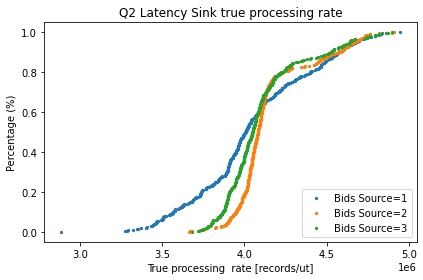

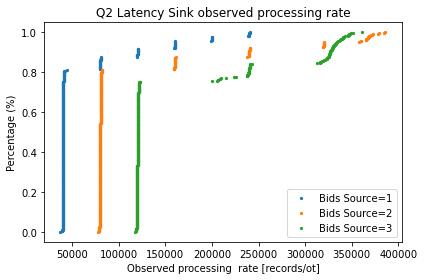

In [10]:

legend = ["Bids Source=" + str(i) for i in df["BidSource"].unique()]
trueproc = []
observedproc = []
for bs in df["BidSource"].unique():
    d = df[df["BidSource"] == bs]
    observedproc.append(d["observed_proc_rate"].tolist())
    trueproc.append(d["true_proc_rate"].tolist())
#print(observedproc[1])
plot_scatter_ecdf(trueproc,"True processing  rate [records/ut]", "Q2 Latency Sink true processing rate",legend)
plot_scatter_ecdf(observedproc,"Observed processing  rate [records/ot]", "Q2 Latency Sink observed processing rate",legend)

In [ ]:
#df = data[(data["operator_id"]== "Source: Bids Source") & (data["BidSource"] == 1)]
data["filename"].unique()

In [ ]:
data = data.dropna() # we drop the above values
"""
Since we do not need to fill any NaNs via interpolation, I tried to sum the output rates by doing the following:
* Sort dataframe based on timestamp and as a secondary key I added op_instance_id.
* Assuming that each individual operator_id completes its task very closely (time-wise) with the rest operators (performing the same task)
  we aggregate the rows of dataframe in groups of 3 rows. [Note: we chose 3 since the selected parallelism value for the example is 3]
"""
val = 3.0
bs3 = data[(data["operator_id"]=="Source: Bids Source") & (data["total_op_instances"]==val)]
# sorting
sortDF = bs3.sort_values(by=['epoch_timestamp','op_instance_id'])
sortDF = sortDF.reset_index(drop=True)
sortDF.head(27)

In [ ]:
"""Graphs comparing our findings with parallelism value = 1"""
create_scatter_ecdf(df_new["observed_output_rate"],"observed_output_rate","Source Parallelism = 3")
create_scatter_ecdf(df_new["true_output_rate"],"true_output_rate","Source Parallelism = 3")
create_scatter_ecdf(data[(data["operator_id"]=="Source: Bids Source") & (data["total_op_instances"]==1.0)]["true_output_rate"],"true_output_rate","Source Parallelism = 1")

In [ ]:
for x in range(1,5):
    d3 = data[(data["operator_id"]=="Flat Map") & (data["BidSource"] ==x)]
    output = "true_processing_rate"
    title = 'Query2 Source: Custom Source == '+str(x)+' '+output
    ax = d3.plot(title=title,x="epoch_timestamp",y=output)
    ax.set_xlabel("epoch_timestamp")
    ax.set_ylabel(output)
    fig = ax.get_figure()
    fig.savefig('./db/plots/'+d.queryName+'/'+title[:10]+str(x)+'.png')

In [ ]:
uniqueTimestamp = d3["epoch_timestamp"].unique()
plt.hist(uniqueTimestamp, bins = 10)

In [ ]:
myData = data[(data["operator_id"]=="Mapper") & (data["Mapper"] ==4)]


In [ ]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
    
data = data[data["operator_id"] == "Source: Custom Source -> Timestamps-Watermarks"]
uniRates = []
dataSRC = data[data["BidsSource"] == 1]
uniRates.append(dataSRC["true_output_rate"].unique())
dataSRC = data[data["BidsSource"] == 2]
uniRates.append(dataSRC["true_output_rate"].unique())
dataSRC = data[data["BidsSource"] == 3]
uniRates.append(dataSRC["true_output_rate"].unique())
create_scatter_ecdf(uniRates,"true output rate","true_output_rate distribution various bidssource")

In [ ]:
myData = data[(data["operator_id"]=="Mapper") & (data["Mapper"] ==3)]
l = myData["observed_processing_rate"].unique()
plt.hist(l, density=True, bins=20)